<a href="https://colab.research.google.com/github/Shreyatan/Shape_Detection/blob/main/shape_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install OpenCV (if not installed)
!pip install opencv-python-headless

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Upload and load the image
from google.colab import files
uploaded = files.upload()


Saving Screenshot 2024-11-28 005929.png to Screenshot 2024-11-28 005929.png


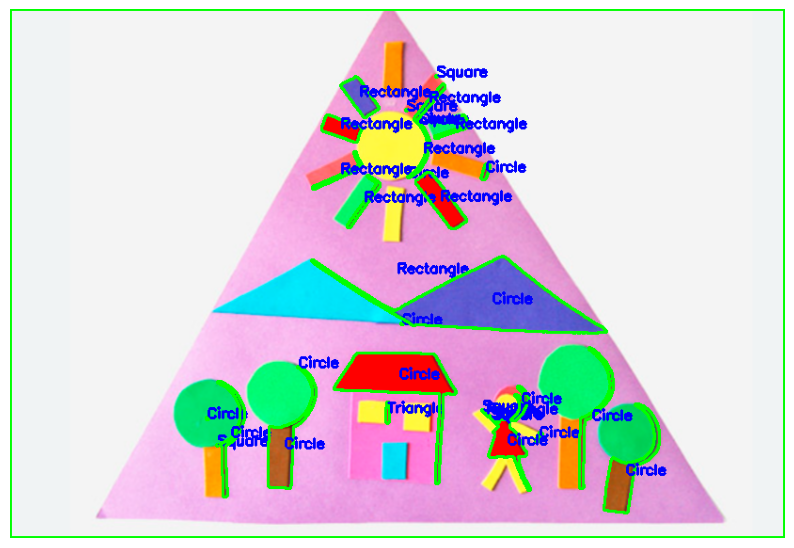

In [ ]:
image_path = next(iter(uploaded.keys()))
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Function to detect shape
def detect_shape(contour):
    # Approximate the contour
    approx = cv2.approxPolyDP(contour, 0.04 * cv2.arcLength(contour, True), True)
    sides = len(approx)

    if sides == 3:
        return "Triangle"
    elif sides == 4:
        # Check for square or rectangle
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = w / float(h)
        return "Square" if 0.95 <= aspect_ratio <= 1.05 else "Rectangle"
    elif sides > 4:
        return "Circle"
    else:
        return "Unknown"

# Draw and label shapes
for contour in contours:
    shape = detect_shape(contour)
    if shape != "Unknown":
        # Draw contours
        cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
        # Get contour center
        M = cv2.moments(contour)
        if M['m00'] != 0:
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])
            cv2.putText(image, shape, (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Display the results
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()